In [1]:
import numpy as np
import time
import torch
import matplotlib.pyplot as plt
plt.rc('text', usetex=False)
import multiprocessing as mp
from typing import Union


from abc import ABC
from epde.preprocessing.cheb import process_point_cheb

from epde.preprocessing.deriv_calculators import Heatmap, AbstractDeriv, AdaptiveFiniteDeriv, PolynomialDeriv, SpectralDeriv, TotalVariation


In [17]:
#kdv
data = np.load('data_kdv_noise0.01.npy')  
grid_x = np.linspace(-4, 4, 32)  
grid_t = np.linspace(0, 1, 32)
x = np.linspace(-4, 4, 32)
t = np.linspace(0, 1, 32)
dx = (4 - (-4)) / 32
dt = (1 - 0) / 32

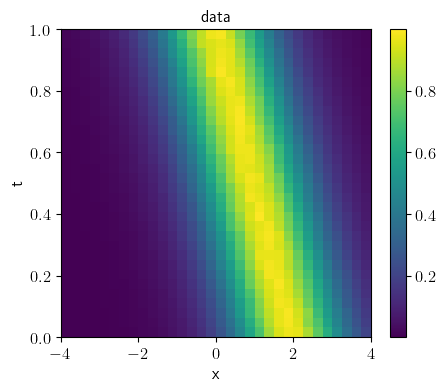

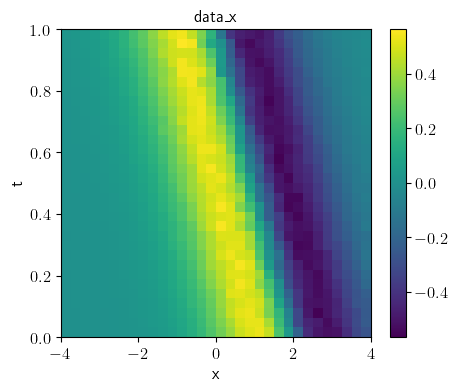

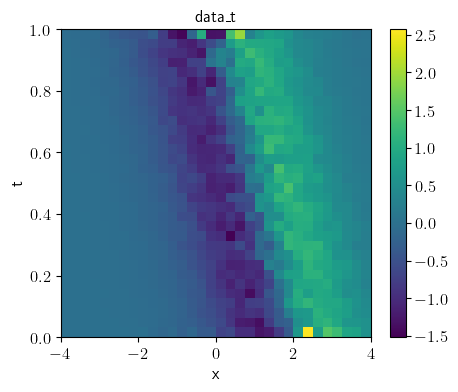

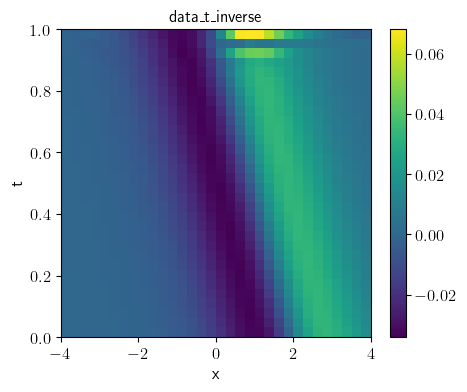

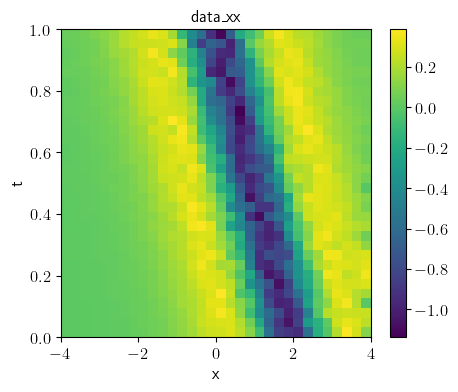

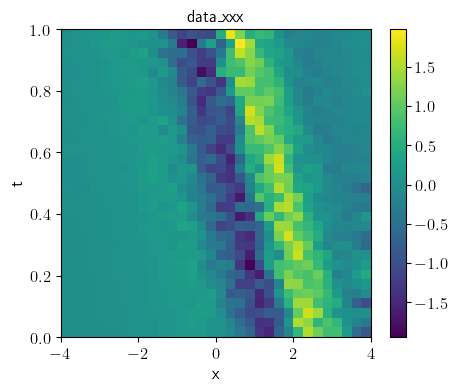

In [18]:
gradient_x = np.gradient(data, dx, axis=1, edge_order=2) 
gradient_t = np.gradient(data, dt, axis=0, edge_order=2)
gradient_xx = np.gradient(np.gradient(data, dx, axis=1, edge_order=2), dx, axis=1, edge_order=2)
gradient_xxx = np.gradient((np.gradient(np.gradient(data, dx, axis=1, edge_order=2), dx, axis=1, edge_order=2)), dx, axis=1, edge_order=2)

gradient_t_inverse = np.load('kdv_Inverse_t_noise0.npy')

plt.figure(figsize=(5, 4))
plt.imshow(data, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_x, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_t, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_t_inverse, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t_inverse')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_xx, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_xxx, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xxx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [19]:
np.save('kdv_Gradient_t_noise0.01.npy', gradient_t)
np.save('kdv_Gradient_x_noise0.01.npy', gradient_x)
np.save('kdv_Gradient_xx_noise0.01.npy', gradient_xx)
np.save('kdv_Gradient_xxx_noise0.01.npy', gradient_xxx)

(32, 32)
(32,)
(32,)


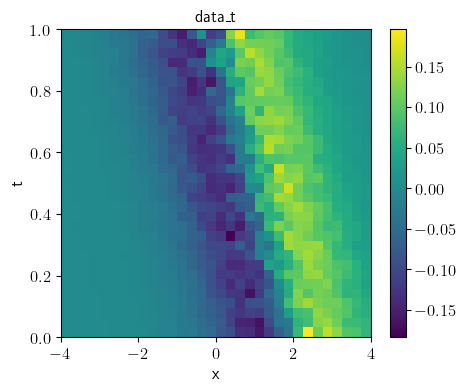

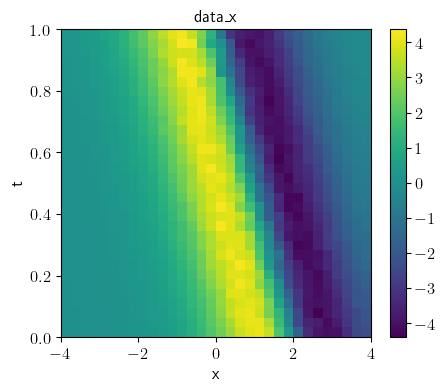

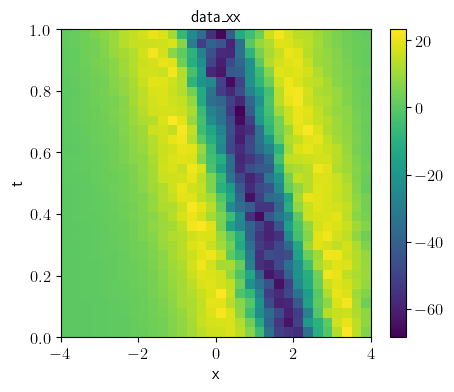

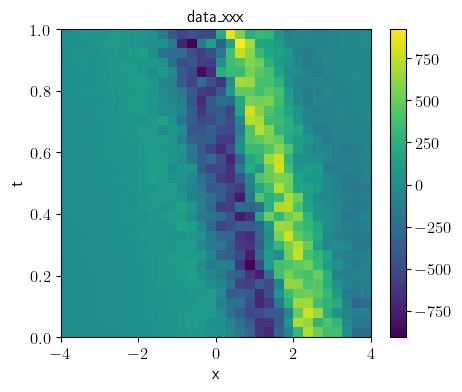

In [20]:
print(data.shape)
print(grid_x.shape)
print(grid_t.shape)
derivative_calculator = AdaptiveFiniteDeriv()

max_order = [2, 2]
mixed = False  

derivatives = derivative_calculator(data, [grid_x, grid_t], max_order, mixed).reshape(32, 32, 4)
derivatives1 = derivative_calculator(derivatives[:, :, 2], [grid_x, grid_t], max_order, mixed).reshape(32, 32, 4)#вторая по х
derivatives2 = derivative_calculator(derivatives1[:, :, 2], [grid_x, grid_t], max_order, mixed).reshape(32, 32, 4)#третья по х

Y, X = np.meshgrid(grid_t, grid_x)

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 0], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 2], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives1[:, :, 2], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives2[:, :, 2], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xxx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [21]:
np.save('kdv_Adaptive_t_noise0.01.npy', derivatives[:, :, 0])
np.save('kdv_Adaptive_x_noise0.01.npy', derivatives[:, :, 2])
np.save('kdv_Adaptive_xx_noise0.01.npy', derivatives1[:, :, 2])
np.save('kdv_Adaptive_xxx_noise0.01.npy', derivatives2[:, :, 2])

In [22]:
print(data.shape)
print(grid_x.shape)
print(grid_t.shape)

(32, 32)
(32,)
(32,)


1024
1024


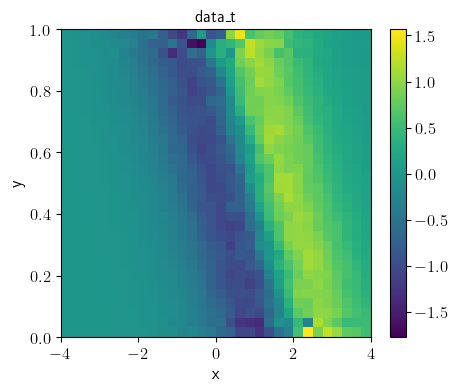

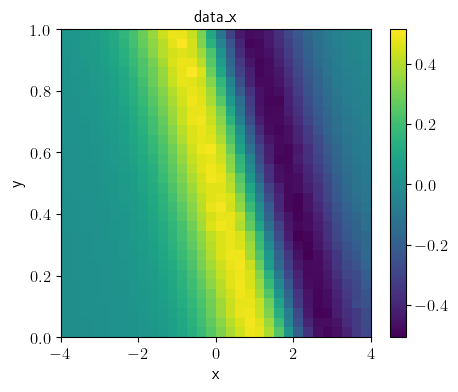

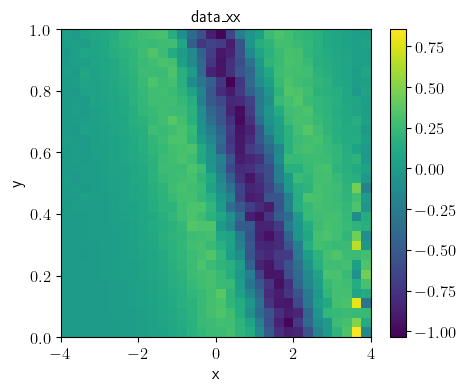

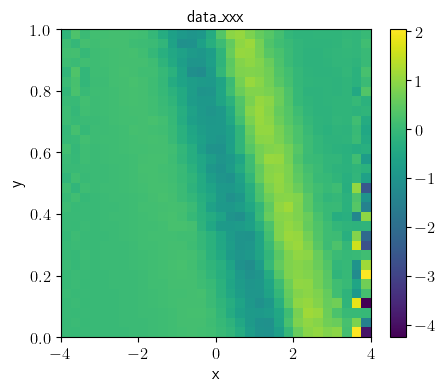

In [23]:
derivative_calculator = PolynomialDeriv()
max_order = 2
grids = np.meshgrid(grid_t, grid_x, indexing='ij')
derivatives = derivative_calculator(data, grids, max_order=max_order, mp_poolsize = 1, polynomial_window = 5, poly_order = 2).reshape(32, 32, 4)
derivatives1 = derivative_calculator(derivatives[:, :, 3], grids, max_order=max_order, mp_poolsize = 1, polynomial_window = 5, poly_order = 2).reshape(32, 32, 4)

Y, X = np.meshgrid(grid_t, grid_x, indexing = 'ij')

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 0], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 2], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 3], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives1[:, :, 2], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xxx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
np.save('kdv_Polynomial_t_noise0.01.npy', derivatives[:, :, 0])
np.save('kdv_Polynomial_x_noise0.01.npy', derivatives[:, :, 2])
np.save('kdv_Polynomial_xx_noise0.01.npy', derivatives[:, :, 3])
np.save('kdv_Polynomial_xxx_noise0.01.npy', derivatives1[:, :, 2])

(32, 32)
2
[array([0.        , 0.03225806, 0.06451613, 0.09677419, 0.12903226,
       0.16129032, 0.19354839, 0.22580645, 0.25806452, 0.29032258,
       0.32258065, 0.35483871, 0.38709677, 0.41935484, 0.4516129 ,
       0.48387097, 0.51612903, 0.5483871 , 0.58064516, 0.61290323,
       0.64516129, 0.67741935, 0.70967742, 0.74193548, 0.77419355,
       0.80645161, 0.83870968, 0.87096774, 0.90322581, 0.93548387,
       0.96774194, 1.        ]), array([-4.        , -3.74193548, -3.48387097, -3.22580645, -2.96774194,
       -2.70967742, -2.4516129 , -2.19354839, -1.93548387, -1.67741935,
       -1.41935484, -1.16129032, -0.90322581, -0.64516129, -0.38709677,
       -0.12903226,  0.12903226,  0.38709677,  0.64516129,  0.90322581,
        1.16129032,  1.41935484,  1.67741935,  1.93548387,  2.19354839,
        2.4516129 ,  2.70967742,  2.96774194,  3.22580645,  3.48387097,
        3.74193548,  4.        ])]


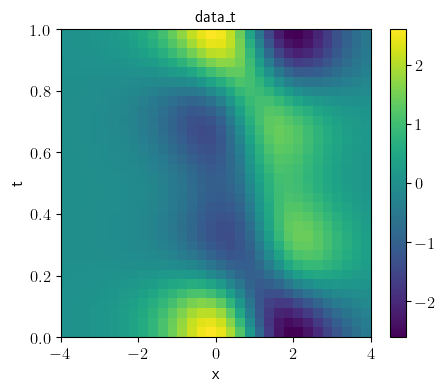

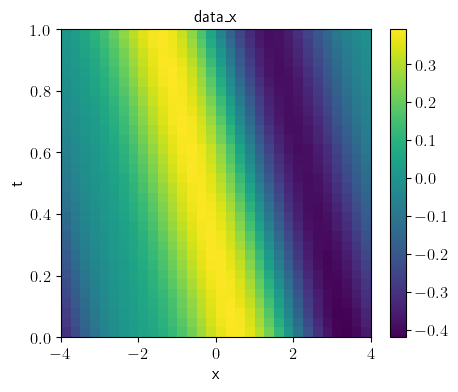

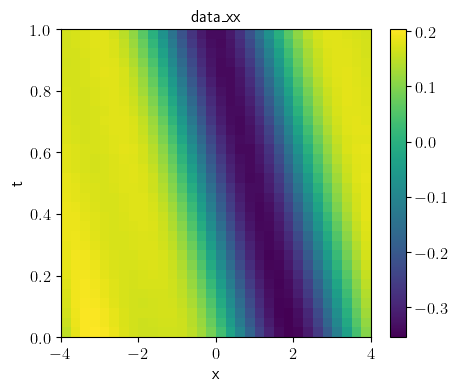

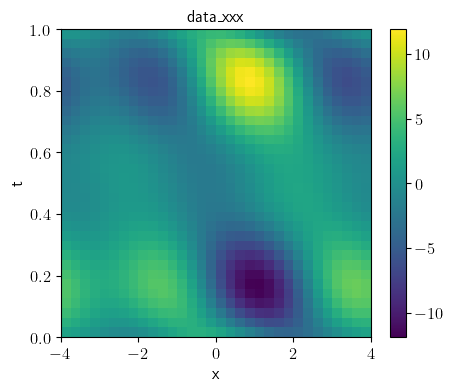

In [25]:
grid = [grid_t, grid_x]
print(data.shape)
print(len(grid))
print(grid)

derivative_calculator = SpectralDeriv()

derivatives = derivative_calculator.spectral_derivative_nd(data, grid, n=5, steepness=10)
derivatives1 = derivative_calculator.spectral_derivative_nd(derivatives[0][1], grid, n=5, steepness=10)
derivatives2 = derivative_calculator.spectral_derivative_nd(derivatives[1][1], grid, n=5, steepness=10)
derivatives3 = derivative_calculator.spectral_derivative_nd(derivatives1[0][1], grid, n=5, steepness=10)

Y, X = np.meshgrid(grid_t, grid_x, indexing = 'ij')

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[0][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[1][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives2[1][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives3[1][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xxx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


In [26]:
np.save('kdv_Spectral_t_noise0.01.npy', derivatives[0][1])
np.save('kdv_Spectral_x_noise0.01.npy', derivatives[1][1])
np.save('kdv_Spectral_xx_noise0.01.npy', derivatives2[1][1])
np.save('kdv_Spectral_xxx_noise0.01.npy', derivatives3[1][1])

In [13]:
lbd = 1000
reg_strng = 100
c_const = 1

derivative_calculator = TotalVariation()

derivatives1 = derivative_calculator.optimize_with_admm(data, lbd, reg_strng, c_const)
derivatives2 = derivative_calculator.optimize_with_admm(derivatives1[0, :, :], lbd, reg_strng, c_const)
derivatives3 = derivative_calculator.optimize_with_admm(derivatives1[1, :, :], lbd, reg_strng, c_const)
derivatives4 = derivative_calculator.optimize_with_admm(derivatives3[1, :, :], lbd, reg_strng, c_const)#третья производная

Y, X = np.meshgrid(grid_t, grid_x, indexing = 'ij')

plt.figure(figsize=(5, 4))
plt.imshow(derivatives1[0, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives1[1, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives3[1, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives4[1, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xxx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


For some reason has to be abysmal: (-165.12070489286467, 341.22190421553637)
0
1


KeyboardInterrupt: 

In [34]:
np.save('kdv_Total_x_noise0.01.npy', derivatives1[0, :, :])
np.save('kdv_Total_xx_noise0.01.npy', derivatives2[0, :, :])
np.save('kdv_Total_xxx_noise0.01.npy', derivatives4[1, :, :])
np.save('kdv_Total_t_noise0.01.npy', derivatives1[1, :, :])

Mean Squared Error (MSE) for noise level 0:
  u_xxx: 0.003933682551061452
  u_x: 4.183716534317958e-05
  u_t: 0.00032902141955187185
Mean Squared Error (MSE) for noise level 0.005:
  u_xxx: 0.01204148923690509
  u_x: 9.474137417560736e-05
  u_t: 0.004788671052075647
Mean Squared Error (MSE) for noise level 0.01:
  u_xxx: 0.04031058947537329
  u_x: 0.0002695378825010616
  u_t: 0.026014832240179076


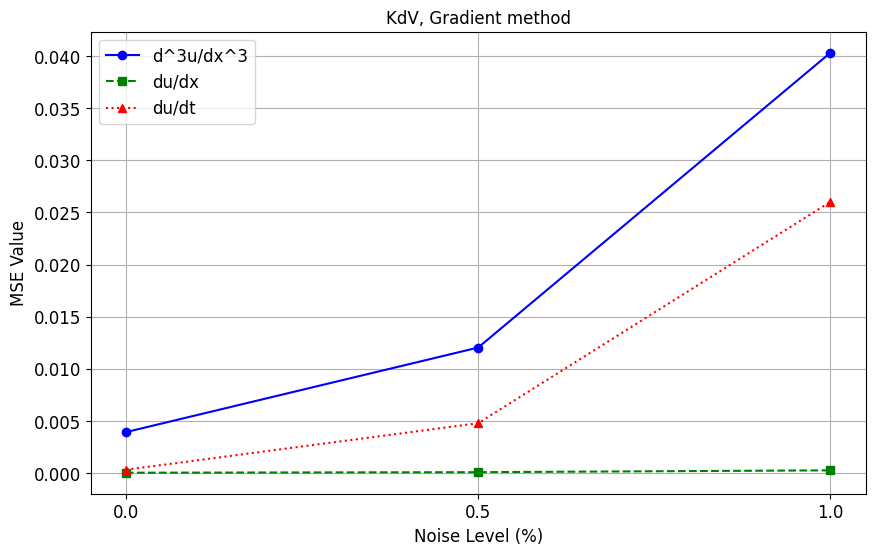

: 

In [ ]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xxx = []
mse_values_u_x = []
mse_values_u_t = []

for noise in noise_levels:
    u_xxx = np.load(f'data_kdv_noise{noise}_u_xxx.npy')
    u_x = np.load(f'data_kdv_noise{noise}_u_x.npy')
    u_t = np.load(f'data_kdv_noise{noise}_u_t.npy')
    
    gradient_xxx = np.load(f'kdv_Gradient_xxx_noise{noise}.npy')
    gradient_x = np.load(f'kdv_Gradient_x_noise{noise}.npy')
    gradient_t = np.load(f'kdv_Gradient_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xxx = calculate_mse(u_xxx, gradient_xxx)
    mse_u_x = calculate_mse(u_x, gradient_x)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_xxx.append(mse_u_xxx)
    mse_values_u_x.append(mse_u_x)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xxx: {mse_u_xxx}')
    print(f'  u_x: {mse_u_x}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xxx, marker='o', linestyle='-', color='b', label='d^3u/dx^3')
plt.plot(noise_levels_percent, mse_values_u_x, marker='s', linestyle='--', color='g', label='du/dx')
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label='du/dt')

plt.title('KdV, Gradient method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('kdv_Gradient_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xxx: 65999.07568117787
  u_x: 4.091785469726168
  u_t: 0.2540647877236319
Mean Squared Error (MSE) for noise level 0.005:
  u_xxx: 67786.05051014776
  u_x: 4.096943615079339
  u_t: 0.2543575648950677
Mean Squared Error (MSE) for noise level 0.01:
  u_xxx: 74009.26662518134
  u_x: 4.1104670627364275
  u_t: 0.2542650526032302


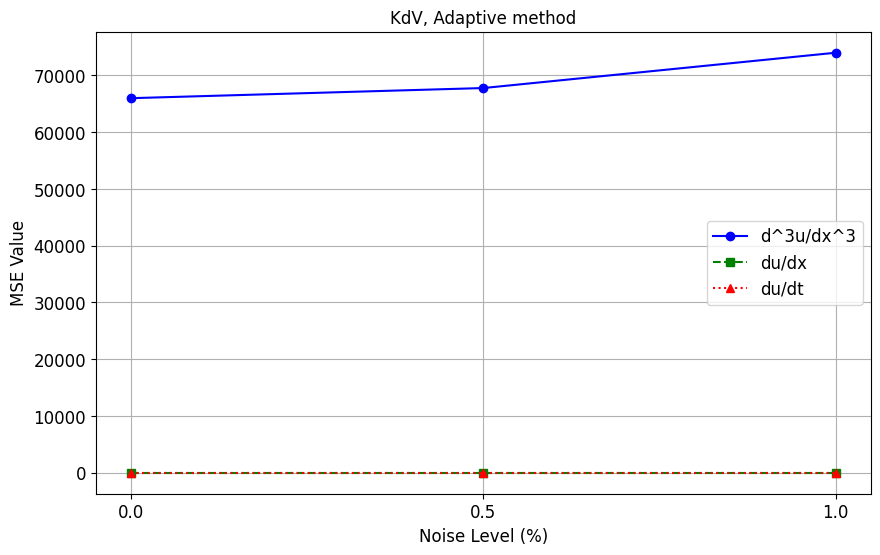

In [40]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xxx = []
mse_values_u_x = []
mse_values_u_t = []

for noise in noise_levels:
    u_xxx = np.load(f'data_kdv_noise{noise}_u_xxx.npy')
    u_x = np.load(f'data_kdv_noise{noise}_u_x.npy')
    u_t = np.load(f'data_kdv_noise{noise}_u_t.npy')
    
    gradient_xxx = np.load(f'kdv_Adaptive_xxx_noise{noise}.npy')
    gradient_x = np.load(f'kdv_Adaptive_x_noise{noise}.npy')
    gradient_t = np.load(f'kdv_Adaptive_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xxx = calculate_mse(u_xxx, gradient_xxx)
    mse_u_x = calculate_mse(u_x, gradient_x)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_xxx.append(mse_u_xxx)
    mse_values_u_x.append(mse_u_x)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xxx: {mse_u_xxx}')
    print(f'  u_x: {mse_u_x}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xxx, marker='o', linestyle='-', color='b', label='d^3u/dx^3')
plt.plot(noise_levels_percent, mse_values_u_x, marker='s', linestyle='--', color='g', label='du/dx')
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label='du/dt')

plt.title('KdV, Adaptive method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('kdv_Adaptive_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xxx: 0.025438450708110166
  u_x: 0.00045321065142352407
  u_t: 7.760588202809193e-05
Mean Squared Error (MSE) for noise level 0.005:
  u_xxx: 0.04999350539079908
  u_x: 0.00045915530303701274
  u_t: 0.002092049771018841
Mean Squared Error (MSE) for noise level 0.01:
  u_xxx: 0.10607522309684148
  u_x: 0.0004993989016774285
  u_t: 0.010593197112400948


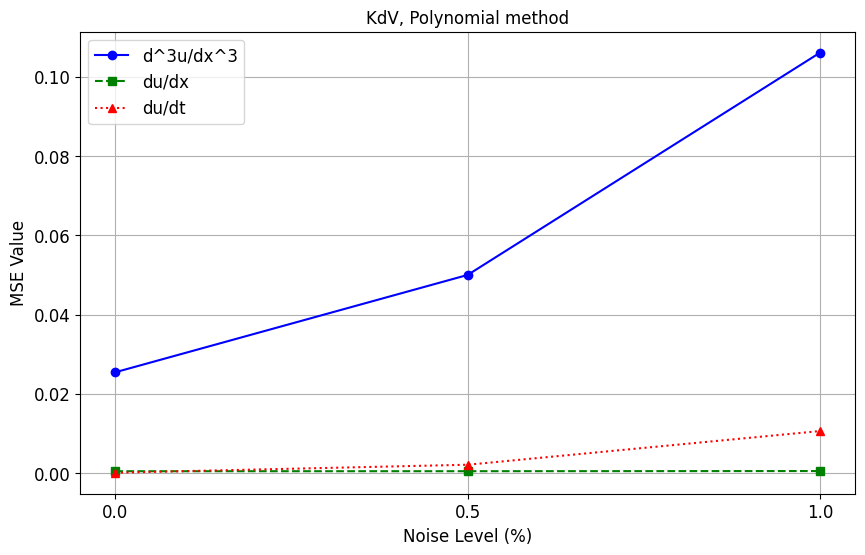

In [41]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xxx = []
mse_values_u_x = []
mse_values_u_t = []

for noise in noise_levels:
    u_xxx = np.load(f'data_kdv_noise{noise}_u_xxx.npy')
    u_x = np.load(f'data_kdv_noise{noise}_u_x.npy')
    u_t = np.load(f'data_kdv_noise{noise}_u_t.npy')
    
    gradient_xxx = np.load(f'kdv_Polynomial_xxx_noise{noise}.npy')
    gradient_x = np.load(f'kdv_Polynomial_x_noise{noise}.npy')
    gradient_t = np.load(f'kdv_Polynomial_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xxx = calculate_mse(u_xxx, gradient_xxx)
    mse_u_x = calculate_mse(u_x, gradient_x)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_xxx.append(mse_u_xxx)
    mse_values_u_x.append(mse_u_x)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xxx: {mse_u_xxx}')
    print(f'  u_x: {mse_u_x}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xxx, marker='o', linestyle='-', color='b', label='d^3u/dx^3')
plt.plot(noise_levels_percent, mse_values_u_x, marker='s', linestyle='--', color='g', label='du/dx')
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label='du/dt')

plt.title('KdV, Polynomial method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('kdv_Polynomial_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xxx: 14.233385398794685
  u_x: 0.012858691609879
  u_t: 0.7797580669701534
Mean Squared Error (MSE) for noise level 0.005:
  u_xxx: 14.241826388166881
  u_x: 0.012849041338489617
  u_t: 0.7803548607978698
Mean Squared Error (MSE) for noise level 0.01:
  u_xxx: 14.263654801608032
  u_x: 0.012862266254895987
  u_t: 0.7811153907029464


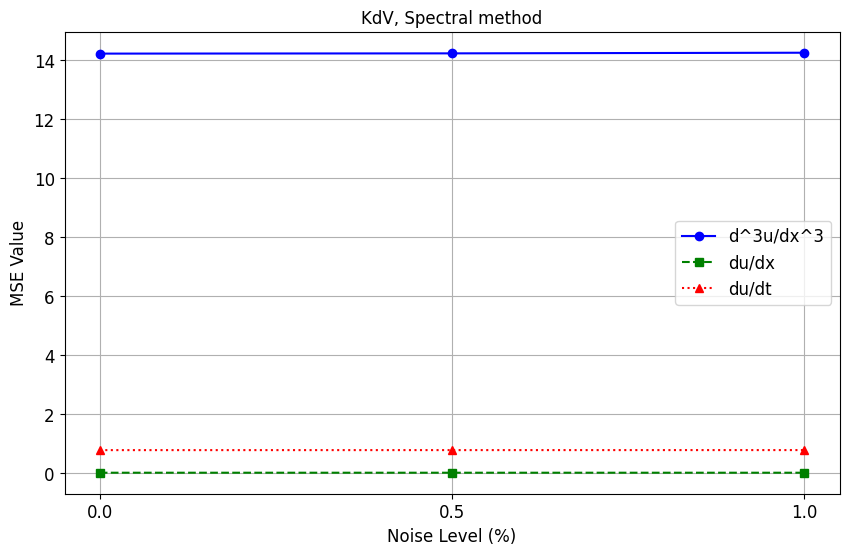

In [42]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xxx = []
mse_values_u_x = []
mse_values_u_t = []

for noise in noise_levels:
    u_xxx = np.load(f'data_kdv_noise{noise}_u_xxx.npy')
    u_x = np.load(f'data_kdv_noise{noise}_u_x.npy')
    u_t = np.load(f'data_kdv_noise{noise}_u_t.npy')
    
    gradient_xxx = np.load(f'kdv_Spectral_xxx_noise{noise}.npy')
    gradient_x = np.load(f'kdv_Spectral_x_noise{noise}.npy')
    gradient_t = np.load(f'kdv_Spectral_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xxx = calculate_mse(u_xxx, gradient_xxx)
    mse_u_x = calculate_mse(u_x, gradient_x)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_xxx.append(mse_u_xxx)
    mse_values_u_x.append(mse_u_x)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xxx: {mse_u_xxx}')
    print(f'  u_x: {mse_u_x}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xxx, marker='o', linestyle='-', color='b', label='d^3u/dx^3')
plt.plot(noise_levels_percent, mse_values_u_x, marker='s', linestyle='--', color='g', label='du/dx')
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label='du/dt')

plt.title('KdV, Spectral method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('kdv_Spectral_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xxx: 0.3202310787234075
  u_x: 0.047267527404610155
  u_t: 0.31050871376133515
Mean Squared Error (MSE) for noise level 0.005:
  u_xxx: 0.32110404798257525
  u_x: 0.047254401912381935
  u_t: 0.3113905667070983
Mean Squared Error (MSE) for noise level 0.01:
  u_xxx: 0.35679459293039795
  u_x: 0.047292688681170786
  u_t: 0.31079706426038345


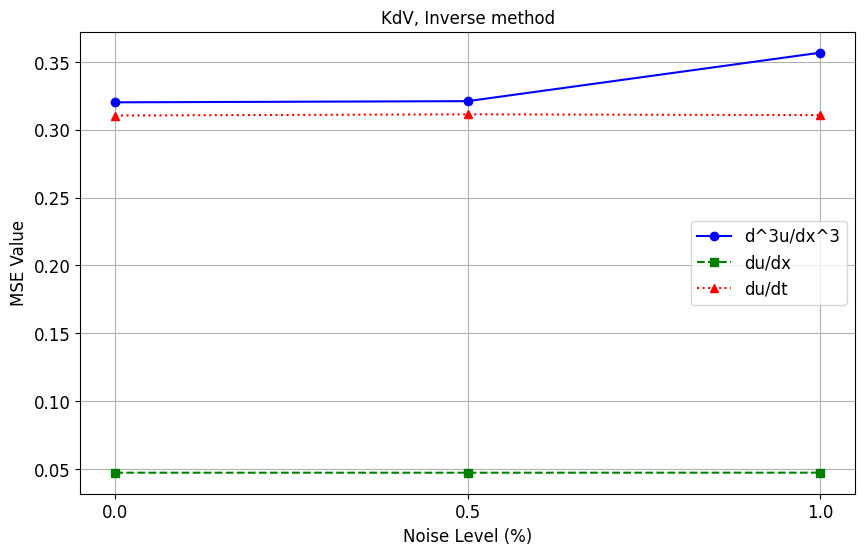

In [43]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xxx = []
mse_values_u_x = []
mse_values_u_t = []

for noise in noise_levels:
    u_xxx = np.load(f'data_kdv_noise{noise}_u_xxx.npy')
    u_x = np.load(f'data_kdv_noise{noise}_u_x.npy')
    u_t = np.load(f'data_kdv_noise{noise}_u_t.npy')
    
    gradient_xxx = np.load(f'kdv_Inverse_xxx_noise{noise}.npy')
    gradient_x = np.load(f'kdv_Inverse_x_noise{noise}.npy')
    gradient_t = np.load(f'kdv_Inverse_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xxx = calculate_mse(u_xxx, gradient_xxx)
    mse_u_x = calculate_mse(u_x, gradient_x)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_xxx.append(mse_u_xxx)
    mse_values_u_x.append(mse_u_x)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xxx: {mse_u_xxx}')
    print(f'  u_x: {mse_u_x}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xxx, marker='o', linestyle='-', color='b', label='d^3u/dx^3')
plt.plot(noise_levels_percent, mse_values_u_x, marker='s', linestyle='--', color='g', label='du/dx')
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label='du/dt')

plt.title('KdV, Inverse method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('kdv_Inverse_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xxx: 0.32750713769489903
  u_x: 0.09371403253270225
  u_t: 0.3569583551271306
Mean Squared Error (MSE) for noise level 0.005:
  u_xxx: 0.3275021536141888
  u_x: 0.09370493435266508
  u_t: 0.3570571256105288
Mean Squared Error (MSE) for noise level 0.01:
  u_xxx: 0.32728584362789037
  u_x: 0.09363516539375873
  u_t: 0.3572689125570128


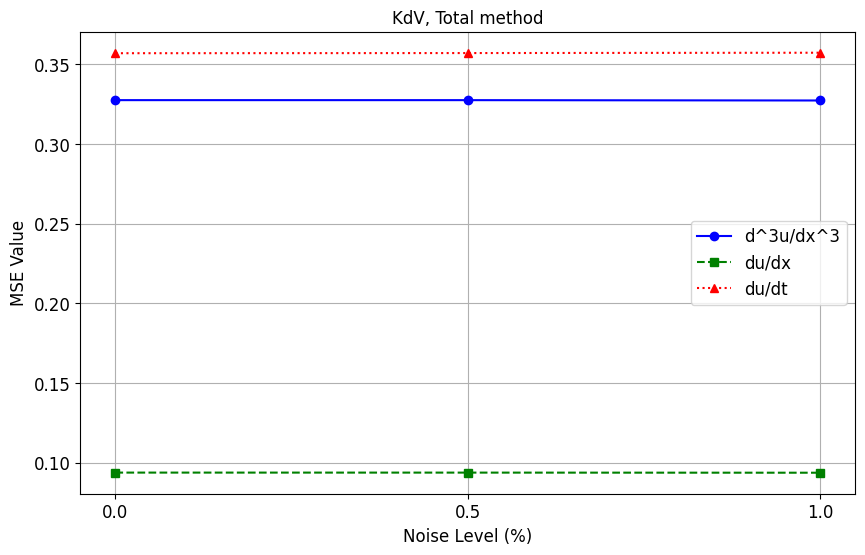

In [44]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xxx = []
mse_values_u_x = []
mse_values_u_t = []

for noise in noise_levels:
    u_xxx = np.load(f'data_kdv_noise{noise}_u_xxx.npy')
    u_x = np.load(f'data_kdv_noise{noise}_u_x.npy')
    u_t = np.load(f'data_kdv_noise{noise}_u_t.npy')
    
    gradient_xxx = np.load(f'kdv_Total_xxx_noise{noise}.npy')
    gradient_x = np.load(f'kdv_Total_x_noise{noise}.npy')
    gradient_t = np.load(f'kdv_Total_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xxx = calculate_mse(u_xxx, gradient_xxx)
    mse_u_x = calculate_mse(u_x, gradient_x)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_xxx.append(mse_u_xxx)
    mse_values_u_x.append(mse_u_x)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xxx: {mse_u_xxx}')
    print(f'  u_x: {mse_u_x}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xxx, marker='o', linestyle='-', color='b', label='d^3u/dx^3')
plt.plot(noise_levels_percent, mse_values_u_x, marker='s', linestyle='--', color='g', label='du/dx')
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label='du/dt')

plt.title('KdV, Total method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('kdv_Total_error.pdf', format='pdf')
plt.show()
